In [1]:
# importing the Libraries ..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data CollectionV( Reading the csv data ) and Data Preprocessing .

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/drive/MyDrive/Data/gld_price_data .csv')


In [5]:

# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:

# print last 5 rows of the dataframe
gold_data.tail()


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [8]:

# number of rows and columns
gold_data.shape

(2290, 6)

In [9]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

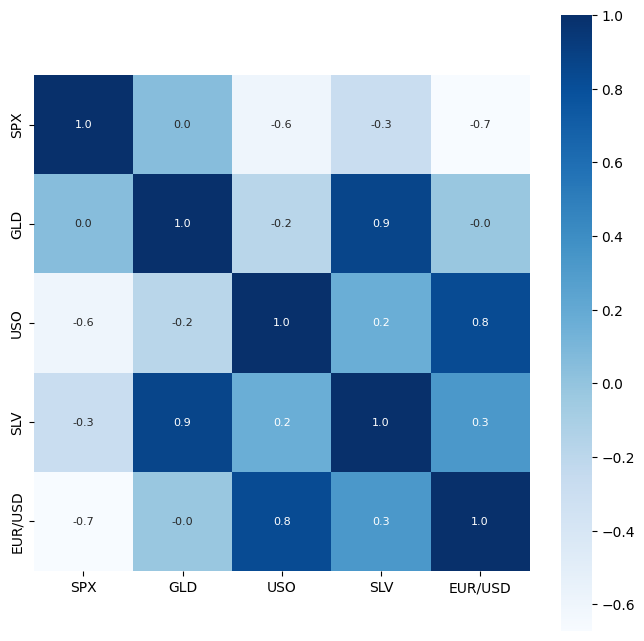

In [13]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [16]:
# correlation values of GLD
print(correlation['SPX'])

SPX        1.000000
GLD        0.049345
USO       -0.591573
SLV       -0.274055
EUR/USD   -0.672017
Name: SPX, dtype: float64


<ipython-input-17-fedbfade8e4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['SPX'],color='red')


<Axes: xlabel='SPX', ylabel='Density'>

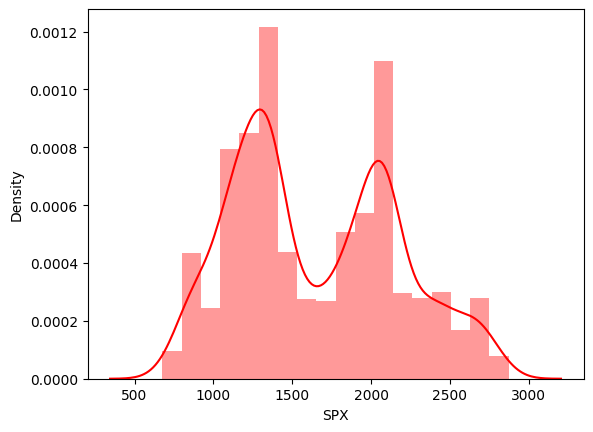

In [17]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['SPX'],color='red')

In [20]:
X = gold_data.drop(['Date','SPX'],axis=1)
Y = gold_data['SPX']

In [21]:
print(Y)

0       1447.160034
1       1447.160034
2       1411.630005
3       1416.180054
4       1390.189941
           ...     
2285    2671.919922
2286    2697.790039
2287    2723.070068
2288    2730.129883
2289    2725.780029
Name: SPX, Length: 2290, dtype: float64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators=100)

In [25]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [26]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [27]:
print(test_data_prediction)

[1339.67308362 1299.60041747 1897.90966776 2181.62064214 2357.32610352
 1365.53148433 1312.19280519 2475.18289774 1944.05580194 1978.98080075
 2059.07463004 1158.86531735 1588.7726756  1332.59260004 2066.86578375
 2347.60937491 1321.93999376 1457.51820311 1371.31776978 1263.66330319
 1559.42547508 1700.12307985 1142.58049814 1322.4777186  2727.02321058
  981.10089103 1170.76119745 1811.46339708 1890.81679199 1377.32940674
  856.9090034  2691.86552975 1298.67079217 1927.8004796  1065.76808211
 1238.77430529 2069.87227524 2065.27857894 1246.3474987  2094.30031741
 1097.14990058 1380.05501106 2675.41118898 1247.3121948  1309.10738636
 1812.61200316 2309.3290968  1954.71313001 1333.69501107 1964.97790386
  849.94809394 2101.89696763 2264.13650522 1996.43381721 2470.45846917
 1764.49629256 1489.46300794 1290.80760993 1335.03349725 1380.1764928
 1349.67041154 1380.29830809  778.11470412 2641.76494637 2671.79476318
 1373.87591042 1300.54641606 2533.00811783 1970.8460229  1044.88879642
 1251.1

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.9605500403156726


Compare the Actual Values and Predicted Values in a Plot

In [29]:
Y_test = list(Y_test)

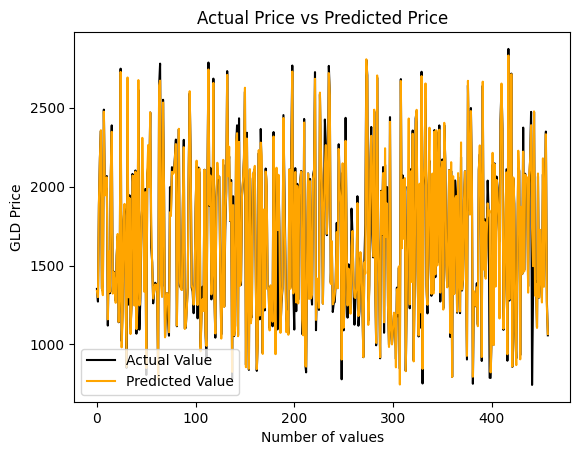

In [30]:
plt.plot(Y_test, color='black', label = 'Actual Value')
plt.plot(test_data_prediction, color='orange', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()